# **Importing some essential libraries to start analyzing the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#necessary connection to save the new files that will be generated throughout the code

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upload the file
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# **Understanding and checking the first information from dataset**


 First impressions of the dataset containing basic information, dimensions and data types. This way we can better understand what type of material we have on hand

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
print(f'The total shape of the data set {df.shape}')
print(f'The total rows of the data set {df. shape [0]}')
print(f'The total columns of the data set {df. shape [1]}')

The total shape of the data set (374, 13)
The total rows of the data set 374
The total columns of the data set 13


# **Data Cleaning**


**Checking missing values**


Here we see that in the dataset the missing values actually correspond to people who stated that they did not have any sleep disorders, that is, NaN would actually be None. Let's resolve this  misunderstanding by replacing NaN with None using *.fillna()*

In [ ]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Filter to only columns with missing values
print(null_counts)

Sleep Disorder    219
dtype: int64


In [ ]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [ ]:
df['Sleep Disorder'].fillna('None', inplace=True)
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

**Checking duplicate row**

 As an important practice in the data processing and checking process, we will check if we have any row that is duplicate. In this case, we don't have it. So we can proceed


In [ ]:
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


**Erroneous Data**


Here we have two categories that can be considered equal: Normal and Normal Weight. For this reason we are merging both into a single feature using *.replace*( )

In [ ]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

# **Exploratory Data Analysis (EDA)**


Here begins the process of exploration, visualization, analysis and insights into the dataset, with the aim of preparing the data for use in models and obtaining more accurate results.





# **Data Visualization**

**Univariate Analysis**

Visualization of only one variable

In the first code we have graphs of the numerical variables and how the data is distributed.

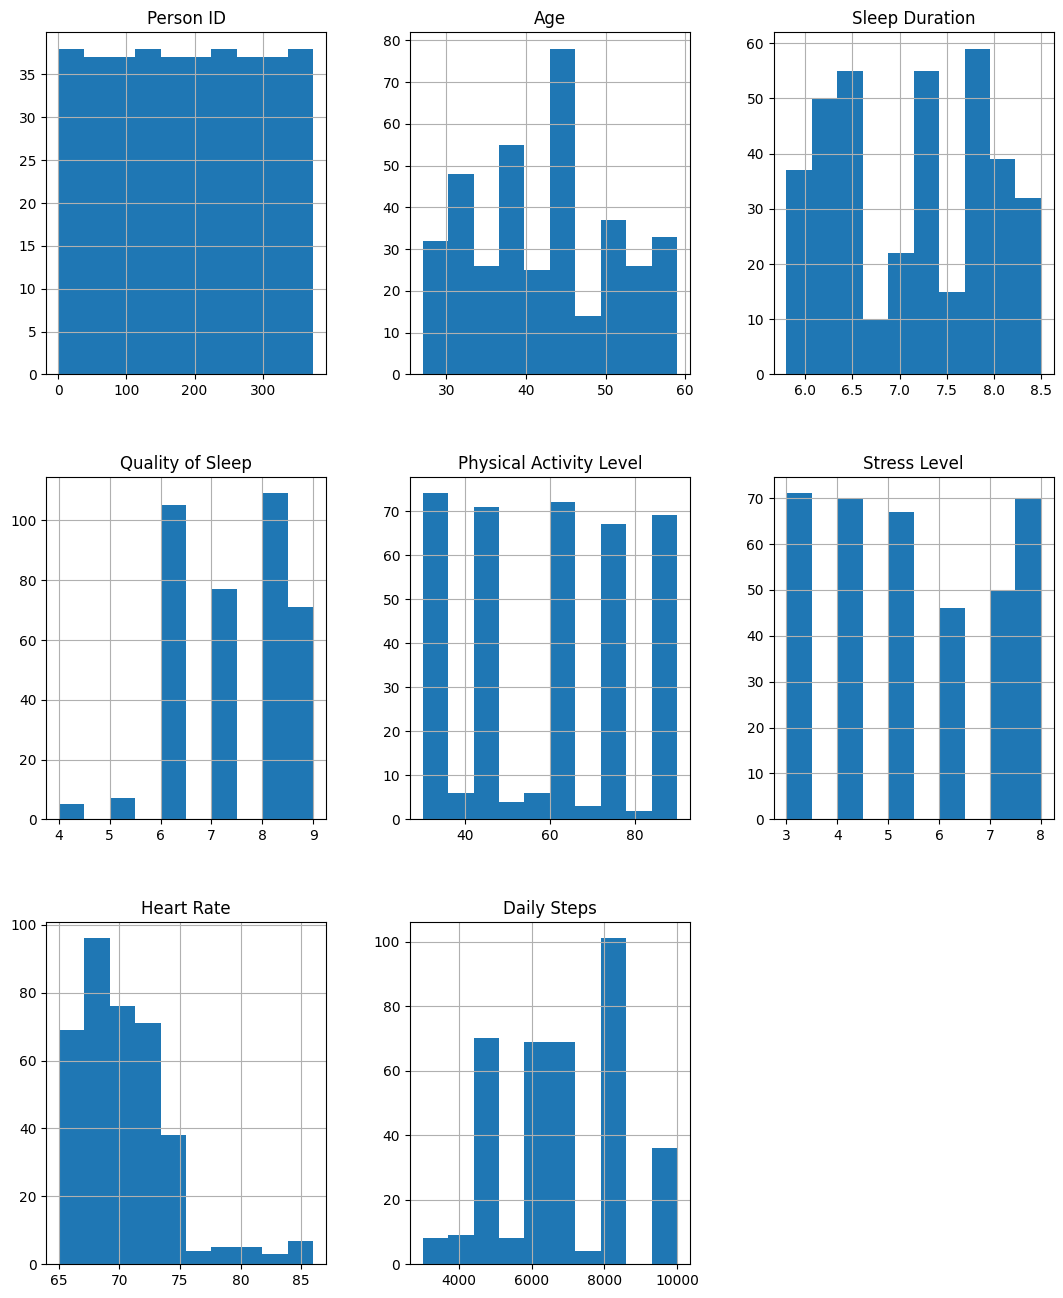

In [ ]:
df.hist(figsize=(13,16))
plt.show()

Distribution of the variable Gender which can be considered balanced, since the number of females and males are almost equal.

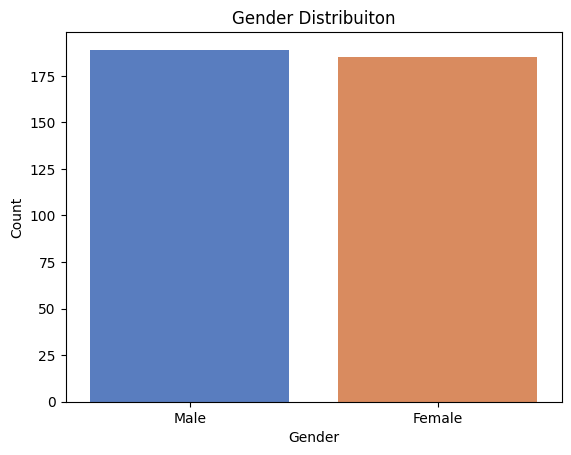

In [ ]:
custom_palette = sns.color_palette('muted', as_cmap=True)
sns.countplot(data=df, x='Gender', palette='muted')
plt.title('Gender Distribuiton')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Observation of the Sleep Disorder variable. If we add Insomnia and Sleep Apnea we can conclude that the percentage of people with sleep disorders is close to the percentage of people who do not have problems sleeping.

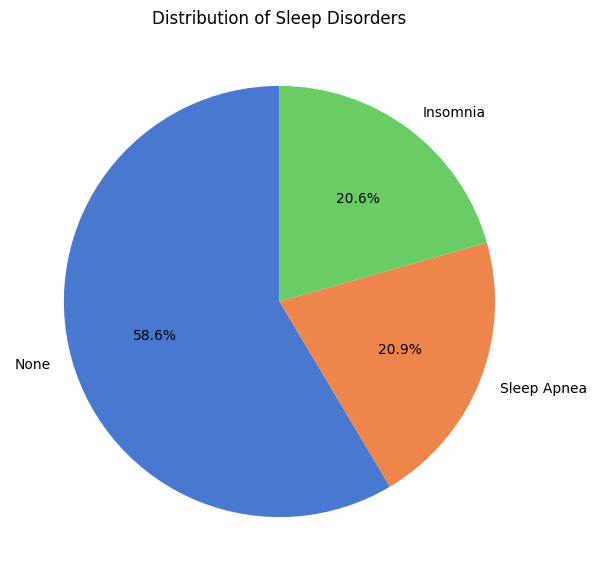

In [ ]:
sleep_disorder = df['Sleep Disorder'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sleep_disorder, labels=sleep_disorder.index, autopct='%.1f%%', startangle=90, colors=custom_palette)
plt.title('Distribution of Sleep Disorders')
plt.show()


**Bivariate Analysis**

Visualization of two variables and their relationships

In this view we have Stress Level and Quality of Sleep. The higher the quality of sleep, the lower the level of stress

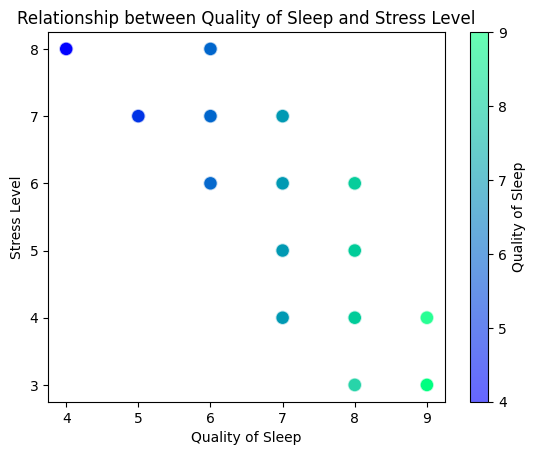

In [ ]:
sc_1 = plt.scatter(df['Quality of Sleep'], df['Stress Level'], cmap='winter', c=df['Quality of Sleep'], edgecolors='w', alpha=0.6, s=100)
plt.title('Relationship between Quality of Sleep and Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')

#add a color bar
cbar = plt.colorbar(sc_1)
cbar.set_label('Quality of Sleep')

plt.show()

Here we have Sleep Duration and Quality of Sleep. The higher the quality of sleep, the longer the sleep duration

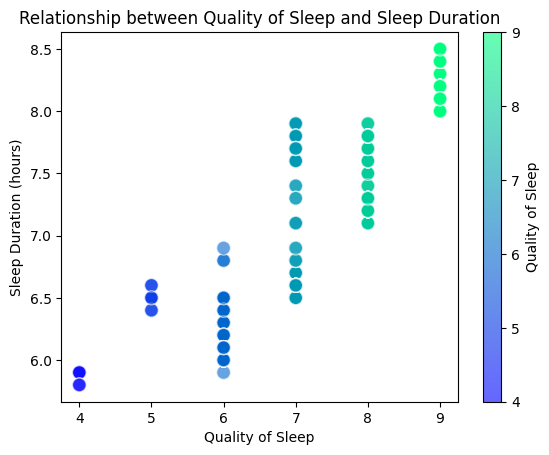

In [ ]:
sc_2 = plt.scatter(df['Quality of Sleep'], df['Sleep Duration'], cmap='winter', c=df['Quality of Sleep'], edgecolors='w', alpha=0.6, s=100)
plt.title('Relationship between Quality of Sleep and Sleep Duration')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')

#add a color bar
cbar = plt.colorbar(sc_2)
cbar.set_label('Quality of Sleep')

plt.show()

In this view we have Sleep Duration and Sleep Disorder. It is noticed that even people with sleep disorders can sleep for about 7 hours or more

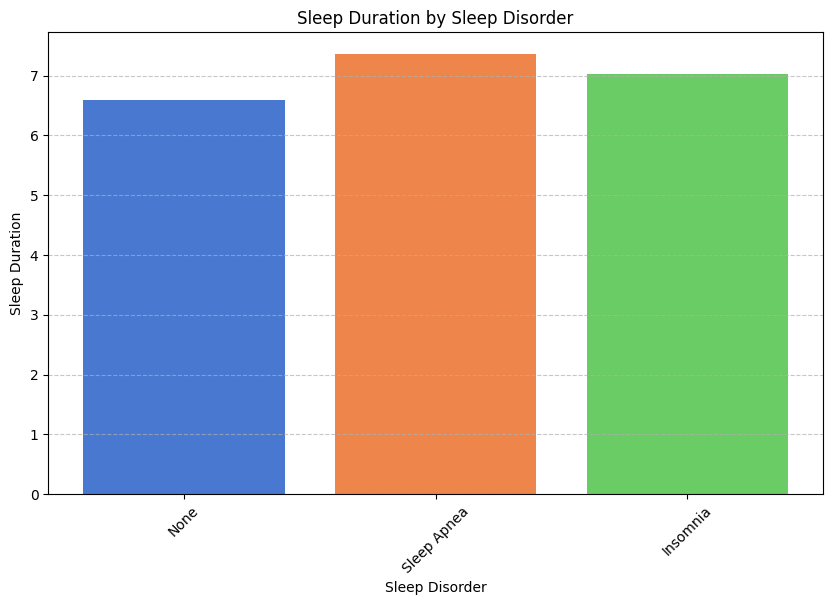

In [ ]:
x = df['Sleep Disorder'].unique()
y = df.groupby('Sleep Disorder')['Sleep Duration'].mean()

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=custom_palette)
plt.title('Sleep Duration by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Here we have Sleep Quality and Gender. It analyzes how males and females evaluate quality of sleep

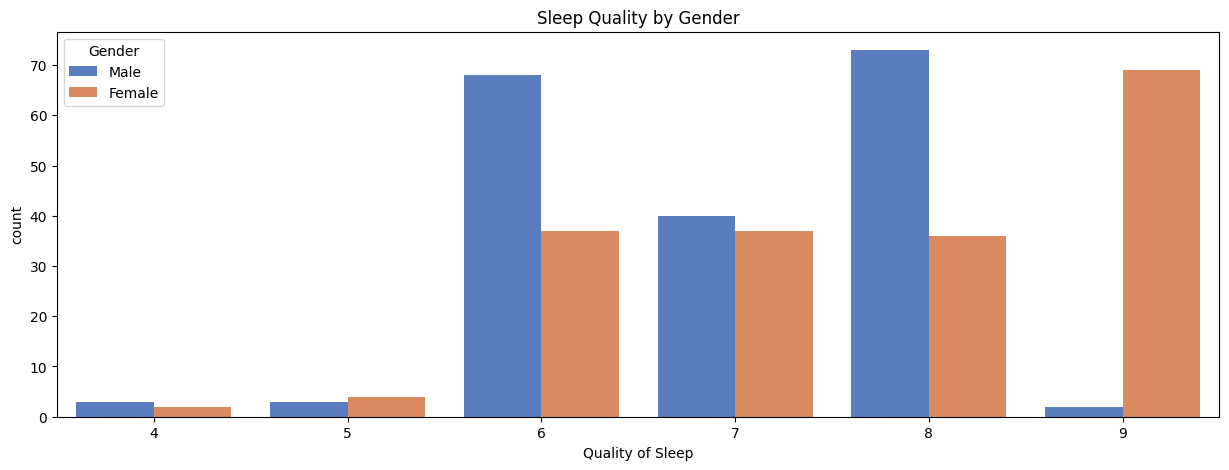

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
for i, col in enumerate(['Quality of Sleep']):
    sns.countplot(data=df,
                  x=col,
                  palette=custom_palette,
                  hue='Gender',
                  ax=ax)

ax.set_title('Sleep Quality by Gender')

plt.show()

This is a visualization that shows the rates of sleep disorders by profession, giving a good idea of which professionals have sleep disorders and which professionals do not

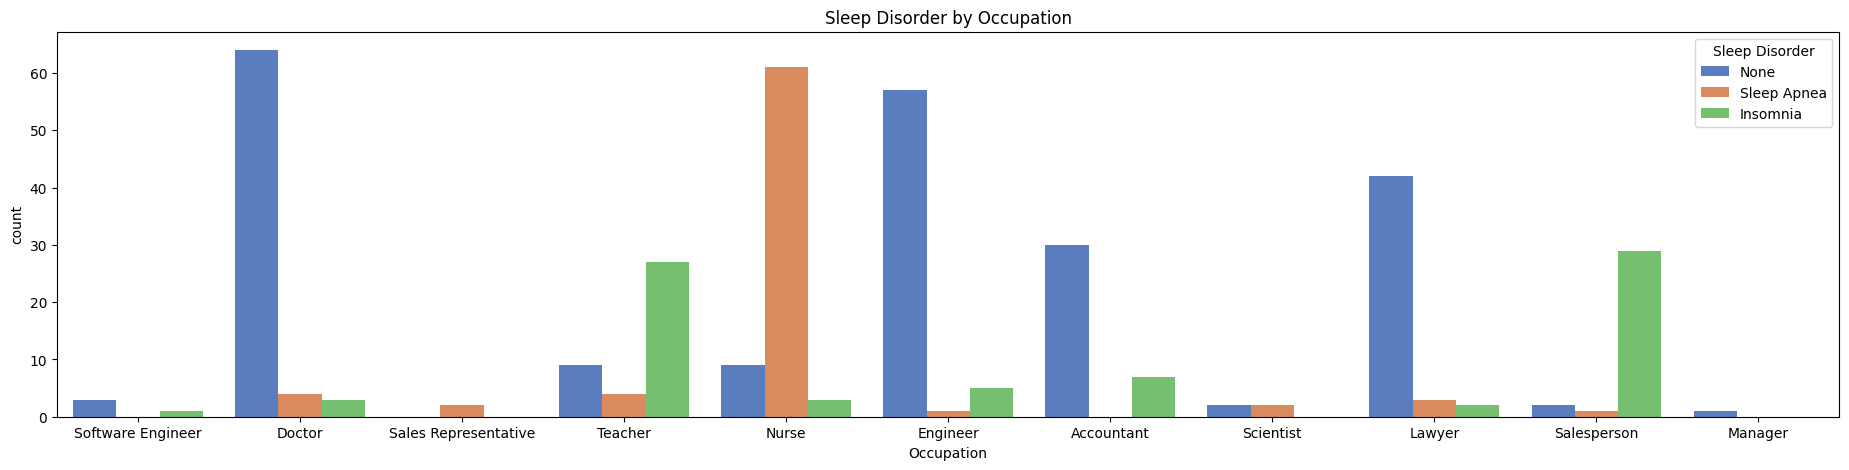

In [ ]:
fig, ax = plt.subplots(figsize=(23,5))
for i, col in enumerate(['Occupation']):
  sns.countplot(data=df,
                x=col,
                palette=custom_palette,
                hue='Sleep Disorder',
                ax=ax)

ax.set_title('Sleep Disorder by Occupation')

plt.show()

In this code we have Sleep Duration and BMI Category where it is noted that people with normal BMI sleep more hours (mostly), while people with overweight BMI sleep fewer hours (with some exceptions)

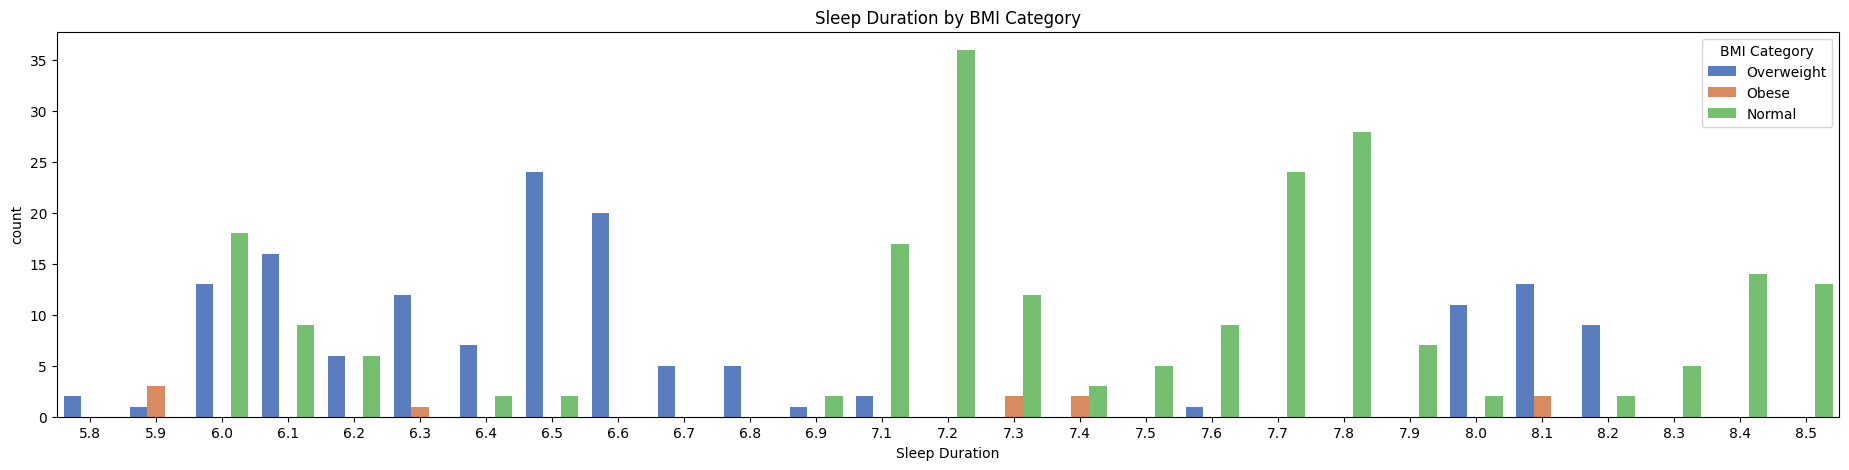

In [ ]:
fig, ax = plt.subplots(figsize=(23,5))
for i, col in enumerate(['Sleep Duration']):
  sns.countplot(data=df,
                x=col,
                palette=custom_palette,
                hue='BMI Category')

ax.set_title('Sleep Duration by BMI Category')

plt.show()

**Multivariate Analysis**

Visualization of three or more variables simultaneously allows you to identify complex patterns in data and better understand the underlying structure of the data.

In this heatmap we can observe how strong or weak the relationships of the variables are

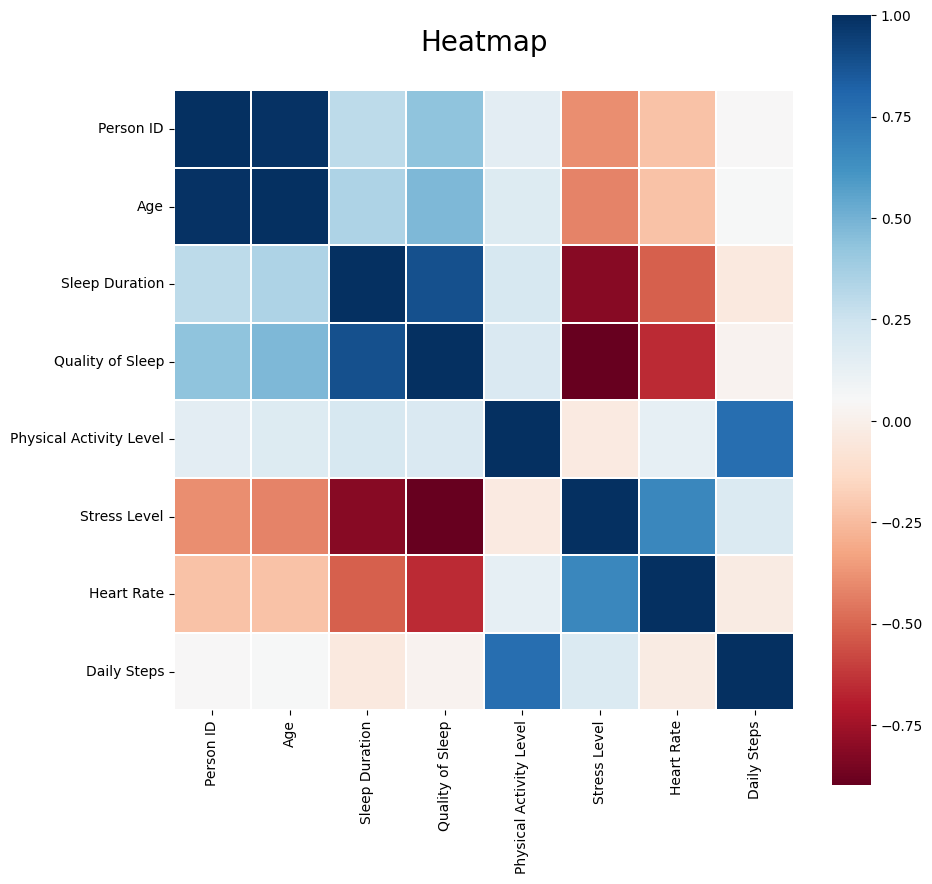

In [ ]:
#selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
plt.title('Heatmap', y=1.05, size=20)
sns.heatmap(numeric_df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=False)
plt.show()

For the last code we have a 3D visualization including the variables Quality of Sleep, Stress Level and Age.

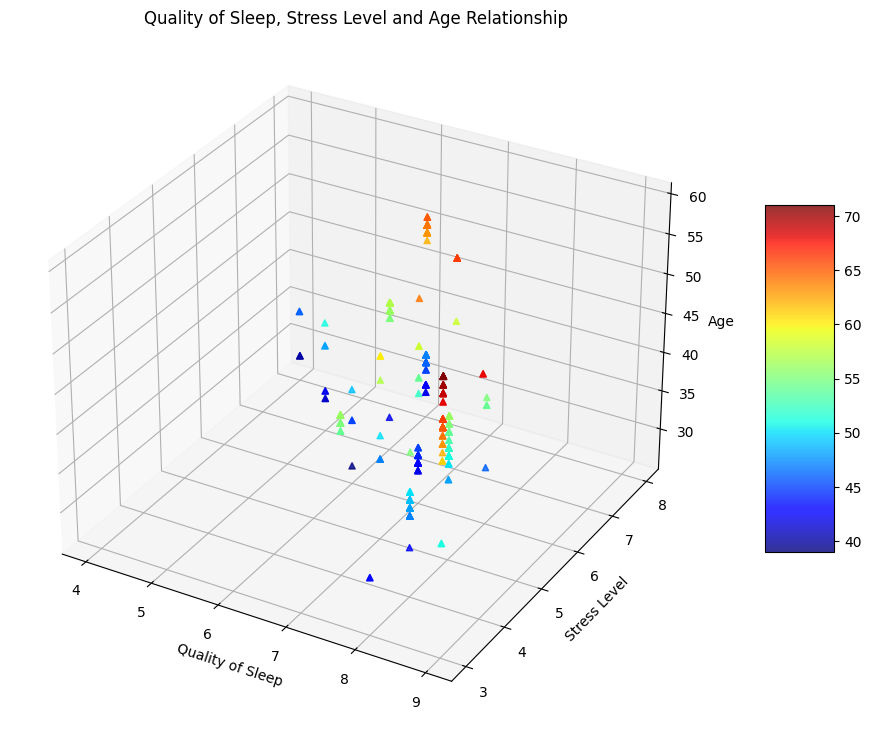

In [ ]:
#package required for 3d visualizations
from mpl_toolkits.mplot3d import Axes3D

x = (df['Quality of Sleep'])
y = (df['Stress Level'])
z = (df['Age'])


fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection='3d')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2) #adding grid
my_cmap = plt.get_cmap('jet') #creating color map
sctt = ax.scatter3D(x, y, z,  #creating plot
                    alpha=0.8,
                    c=(x + y + z),
                    cmap=my_cmap,
                    marker='^')

#adding axis titles and labels
plt.title('Quality of Sleep, Stress Level and Age Relationship')
ax.set_xlabel('Quality of Sleep')
ax.set_ylabel('Stress Level')
ax.set_zlabel('Age')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5) #Adding the color bar

plt.show()

# ***Feature Engineering***


For statistical calculation purposes, we also have to work on a solution to deal with the value in the 'Blood Pressure' feature since we have the slash'/' character that ends up turning this feature into an Object.


To deal with this problem, let's remove "/" and put Systolic values in one new column and Diastolic values in another new column. Both become int64. This way we can drop "Blood Pressure"

In [ ]:
print(df['Blood Pressure'].dtype)

object


In [ ]:
df[['Systolic_bp', 'Diastolic_bp']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
df[['Systolic_bp', 'Diastolic_bp']] = df[['Systolic_bp', 'Diastolic_bp']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
df = df.drop('Blood Pressure', axis=1)

In [ ]:
print(f'The new type for Systolic_bp is: {df.Systolic_bp.dtype}')
print(f'The new type for Diastolic_bp is: {df.Diastolic_bp.dtype}')

The new type for Systolic_bp is: int64
The new type for Diastolic_bp is: int64


# ***Data Consistency***

To guarantee better results in models that do not accept categorical data, we will work on data consistency by transforming the categorical data from the dataset into int and/or float. For this we will use *LabelEncoder from Sklearn*

In [ ]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].value_counts()

Gender
1    189
0    185
Name: count, dtype: int64

Now we know that:

0 = Female


1 = Male




The same is happening here, where after use fit_transform we gonna have

0 = Insomnia

1 = None

2 = Sleep Apnea

In [ ]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [ ]:
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])
df['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In BMI Category feature we apply the *.map()* function to transform categorical data into numerical data. Final result:

0 = Normal

1 = Obese

2 = Overweight

In [ ]:
df['BMI Category'] = df['BMI Category'].map({'Normal': 0, 'Obese': 1, 'Overweight': 2})
df['BMI Category'].value_counts()

BMI Category
0    216
2    148
1     10
Name: count, dtype: int64

Here we also transform Occupation feature into numbers so that we can use it for statistical purposes. Later we will analyze whether this is an important feature and whether we are going to keep it or get rid of it.

In [ ]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [ ]:
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Occupation'].unique()

array([ 9,  1,  6, 10,  5,  2,  0,  8,  3,  7,  4])

In [ ]:
df['Occupation'].value_counts()

Occupation
5     73
1     71
2     63
3     47
10    40
0     37
7     32
9      4
8      4
6      2
4      1
Name: count, dtype: int64

# ***Outlier***

Checking for outliers and excluding them to ensure the best performance of the models




In [ ]:
from scipy import stats #library required for the statistical calculation of outliers

def detect_outliers_zscore(df, threshold=3):  #function to facilitate the detection of outliers. Value chosen for threshold 3 because we are considering values that are three standard deviations away from the mean as outliers
    z_scores = np.abs(stats.zscore(df))
    return np.where(z_scores > threshold)

outliers_index = detect_outliers_zscore(df)
print('Outlier indices:', outliers_index)

Outlier indices: (array([  3,   4,   5,  93, 145, 264, 266, 276, 277]), array([9, 9, 9, 9, 9, 9, 9, 9, 9]))


<Axes: >

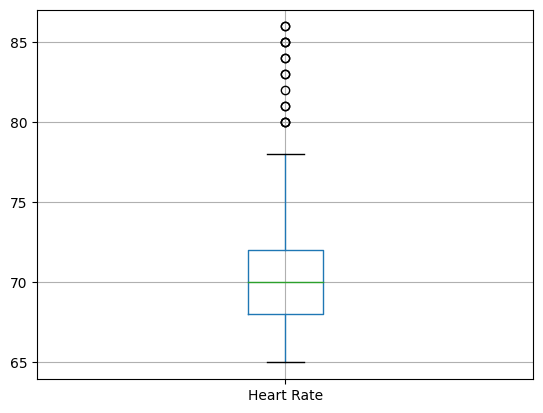

In [ ]:
df.boxplot(column='Heart Rate')

<Axes: >

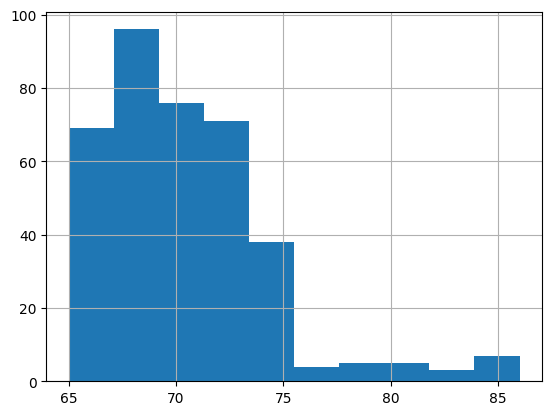

In [ ]:
#checking the distribution before outlier treatment
df['Heart Rate'].hist()

<Axes: >

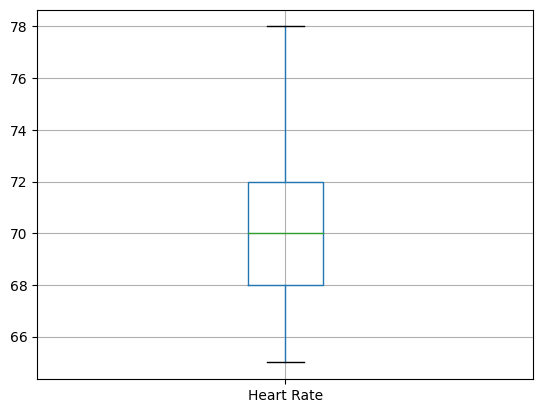

In [ ]:
#dealing with outliers using the IQR technique
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['Heart Rate'] >= Q1 - 1.5 * IQR) & (df['Heart Rate'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  #original DataFrame is updated

df.boxplot(column='Heart Rate')

<Axes: >

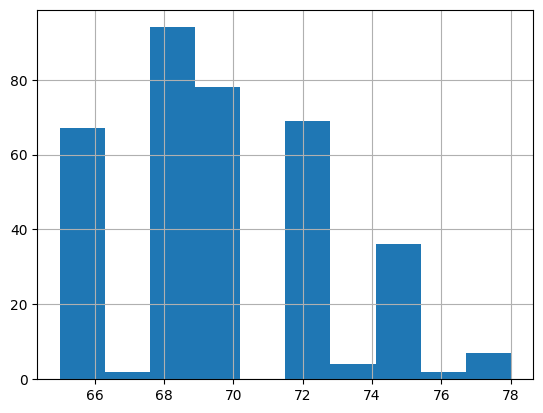

In [ ]:
#new distribution after deal with the outliers
df['Heart Rate'].hist()

Now we have all the data in numeric format and properly processed and aligned. With this we can begin the exploratory analysis more focused on statistics and few more graphical visualizations, looking for insights that make sense for our project and that support our idea.

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_bp,Diastolic_bp
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
7,8,1,29,1,7.8,7,75,6,0,70,8000,1,120,80
8,9,1,29,1,7.8,7,75,6,0,70,8000,1,120,80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                359 non-null    int64  
 1   Gender                   359 non-null    int64  
 2   Age                      359 non-null    int64  
 3   Occupation               359 non-null    int64  
 4   Sleep Duration           359 non-null    float64
 5   Quality of Sleep         359 non-null    int64  
 6   Physical Activity Level  359 non-null    int64  
 7   Stress Level             359 non-null    int64  
 8   BMI Category             359 non-null    int64  
 9   Heart Rate               359 non-null    int64  
 10  Daily Steps              359 non-null    int64  
 11  Sleep Disorder           359 non-null    int64  
 12  Systolic_bp              359 non-null    int64  
 13  Diastolic_bp             359 non-null    int64  
dtypes: float64(1), int64(13)
memory

# **Descriptive Statistics**

Here we explore the main characteristics of the data set, including measures that summarize the central tendency, dispersion and shape of the data distribution.



In [ ]:
df.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_bp,Diastolic_bp
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,190.610028,0.498607,42.428969,3.738162,7.149582,7.376045,59.598886,5.348189,0.807799,69.629526,6945.961003,0.994429,128.214485,84.467967
std,107.055270,0.500696,8.609781,3.051416,0.790936,1.126415,20.799941,1.766760,0.982725,3.231188,1513.894349,0.625324,7.680143,6.209423
min,1.000000,0.000000,27.000000,0.000000,5.900000,5.000000,30.000000,3.000000,0.000000,65.000000,4100.000000,0.000000,115.000000,75.000000
25%,99.500000,0.000000,36.000000,1.000000,6.450000,6.000000,45.000000,4.000000,0.000000,68.000000,6000.000000,1.000000,125.000000,80.000000
50%,191.000000,0.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,1.000000,130.000000,85.000000
75%,284.500000,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,2.000000,72.000000,8000.000000,1.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,2.000000,78.000000,10000.000000,2.000000,140.000000,95.000000


Here we have the code that shows the correlations between the variables, where:

1 indicates a perfect positive correlation,

-1 indicates a perfect negative correlation, and

0 indicates no correlation.




In [ ]:
correlation_matrix = df.corr()
correlation_matrix[correlation_matrix.abs() > 0.01]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_bp,Diastolic_bp
Person ID,1.000000,-0.616335,0.990037,0.326567,0.263134,0.390001,0.109790,-0.366938,0.566197,-0.191564,-0.013341,0.197831,0.674325,0.631099
Gender,-0.616335,1.000000,-0.627738,-0.221461,-0.131019,-0.323473,NaN,0.418940,-0.355351,0.218090,0.023853,-0.258748,-0.252345,-0.297175
Age,0.990037,-0.627738,1.000000,0.283383,0.315749,0.439260,0.142077,-0.397676,0.546573,-0.193177,NaN,0.263489,0.666214,0.632673
Occupation,0.326567,-0.221461,0.283383,1.000000,-0.300616,-0.245145,-0.071944,-0.016720,0.709742,0.018465,-0.097703,-0.185218,0.537932,0.537502
Sleep Duration,0.263134,-0.131019,0.315749,-0.300616,1.000000,0.889815,0.174076,-0.801368,-0.379420,-0.612842,-0.086963,0.193711,-0.172908,-0.163647
Quality of Sleep,0.390001,-0.323473,0.439260,-0.245145,0.889815,1.000000,0.127943,-0.908132,-0.310512,-0.721403,-0.093540,0.217127,-0.086196,-0.091125
Physical Activity Level,0.109790,NaN,0.142077,-0.071944,0.174076,0.127943,1.000000,0.012020,0.086683,0.256545,0.820730,0.466927,0.295088,0.404592
Stress Level,-0.366938,0.418940,-0.397676,-0.016720,-0.801368,-0.908132,0.012020,1.000000,0.159313,0.823647,0.249656,-0.038693,0.092676,0.086953
BMI Category,0.566197,-0.355351,0.546573,0.709742,-0.379420,-0.310512,0.086683,0.159313,1.000000,0.284520,0.035056,NaN,0.742340,0.769162
Heart Rate,-0.191564,0.218090,-0.193177,0.018465,-0.612842,-0.721403,0.256545,0.823647,0.284520,1.000000,0.318414,0.214638,0.202218,0.231000


Here we plot a Heatmap again, this time containing all the features in the dataset, since they are all now in numerical format. This way we appreciate the relationships between the variables in a more graphic way

<Axes: title={'center': 'Heatmap'}>

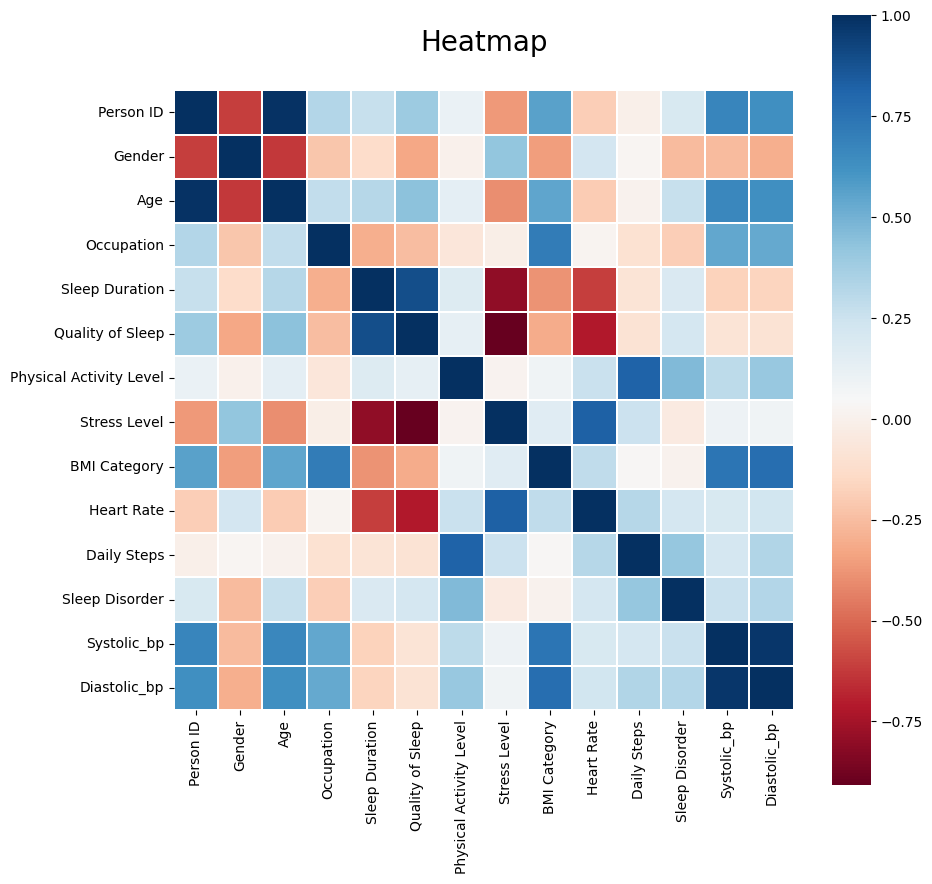

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Heatmap', y=1.05, size=20)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=False)

# **Applying the Models and Checking the Results**

More details about the models and the interpretation of the results can be seen in the report.



# **Dimension reduction techniques**


### **Principal Components Analysis (PCA)**
We started experiments with PCA. To do this, we download the necessary libraries and packages. We then used StandardScaler() to pre-process the data, standardizing the features with mean 0 and standard deviation 1. We ran the model and were unable to identify any visual cluster patterns. It is noted that the variance captured is less than 0.75, which means that we did not capture enough information to have quality results.



In [ ]:
#libraries needed to implement PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
df_scaled = feature_scaler.fit_transform(df)

print(type(df))
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
(359, 14)


In [ ]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(df_scaled)
x_pca = pca.transform(df_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Quality_of_Sleep_pca=list(df['Quality of Sleep'])
data_pca = [go.Scatter(x=x_pca[:,0],
                    y=x_pca[:,1],
                    mode='markers',
                    marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                    text=[f'Quality of Sleep: {a}' for a in Quality_of_Sleep_pca],
                    hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 800, height = 800,
                   xaxis = dict(title='First Principal Component'),
                   yaxis = dict(title='Second Principal Component'))

fig = go.Figure(data=data_pca, layout=layout)
fig.show()

Variance explained by each of the n_components:  [0.33691786 0.28778545]
Total variance explained by the n_components:  0.6247033155712869


### **Uniform Manifold Approximation and Projection (UMAP)**

The second reduction technique applied was UMAP, which promises better results due to the functioning of this model. To do this, it is essential to download !pip install umap-learn. We use the previously processed data *(df_scaled)* and run the model. It is possible to identify some clusters, but not as clearly as we would like.



In [ ]:
#libraries needed to implement UMAP
!pip install umap-learn
import umap.umap_ as umap

In [ ]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_components = 2, n_neighbors=120, min_dist=0.4, random_state=42)
u.fit(df_scaled)
x_umap = u.transform(df_scaled)

Quality_of_Sleep_umap=list(df['Quality of Sleep'])
data_umap = [go.Scatter(x=x_umap[:,0],
                     y=x_umap[:,1],
                     mode='markers',
                     marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                     text=[f'Quality of Sleep: {a}' for a in Quality_of_Sleep_umap],
                     hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction',
                   width = 800, height = 800,
                   xaxis = dict(title='First Dimension'),
                   yaxis = dict(title='Second Dimension'))

fig = go.Figure(data=data_umap, layout=layout)
fig.show()

# **Cluesters**

## Kmeans

The first clustering algorithm used is K-means. Before running the model, we apply the elbow technique to get an idea of how many clusters we can suggest in the parameter *(n_clusters= )*. After that, we put the model to run and we were able to see the cluesters better, however some points do not seem to be in the correct cluster and the clusters are not yet well divided. We save the new lables to the clusters in Google Drive.

In [ ]:
from sklearn.cluster import KMeans

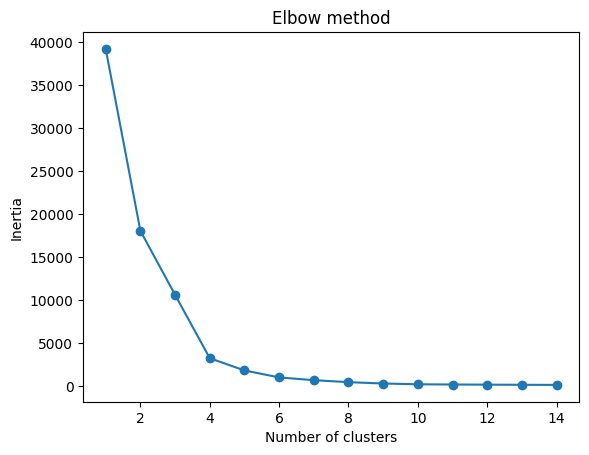

In [ ]:
data = list(zip(x_umap[:, 0], x_umap[:, 1]))
inertias = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_umap)

labels_k = list(kmeans.labels_)
data_umap_kmeans = [go.Scatter(x=x_umap[:, 0],
                     y=x_umap[:, 1],
                     mode='markers',
                     marker=dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5, size=10),
                     text=[f'Quality of Sleep: {a}<br>Label: {b}' for a,b in list(zip(Quality_of_Sleep_umap,labels_k))],
                     hoverinfo='text')]

layout = go.Layout(title='UMAP Dimensionality Reduction + K-means Cluster',
                   width=800,
                   height=800,
                   xaxis=dict(title='First Dimension'),
                   yaxis=dict(title='Second Dimension'))

fig = go.Figure(data=data_umap_kmeans, layout=layout)
fig.show()

df['Label'] = kmeans.labels_
df.to_csv("/content/drive/My Drive/Cluster_Sleep_Kmeans.csv", index=False)
print(df.Label.value_counts())

Label
0    184
4     78
1     33
2     32
3     32
Name: count, dtype: int64


## DBSCAN

As a second option we have DBSCAN. We adjust the eps and min_samples parameters and run the model. The clusters can be visualized, but something is not clear enough. We also save the new lables to the clusters in Google Drive.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=1.5, min_samples=5)
db.fit(x_umap)

labels_db = db.labels_
data_umap_db = [go.Scatter(x=x_umap[:, 0],
                   y=x_umap[:, 1],
                   mode='markers',
                   marker=dict(color=db.labels_, colorscale='Rainbow', opacity=0.5, size=10),
                   text=[f'Quality of Sleep: {a}<br>Label: {b}' for a,b in list(zip(Quality_of_Sleep_umap,labels_db))],
                   hoverinfo='text')]

layout = go.Layout(title='UMAP Dimensionality Reduction + DBSCAN Cluster',
                   width=800,
                   height=800,
                   xaxis=dict(title='First Dimension'),
                   yaxis=dict(title='Second Dimension'))

fig = go.Figure(data=data_umap_db, layout=layout)
fig.show()

df['Label'] = db.labels_
df.to_csv("/content/drive/My Drive/Cluster_Sleep_DBSCAN.csv", index=False)
print(df.Label.value_counts())

Label
0    235
4     33
2     32
3     32
1     27
Name: count, dtype: int64


# **Modifying some points in search of better results**

Rounding 'Sleep Duration' values and drop off 'Gender', 'Person ID', 'Sleep Disorder'  

Sleep Duration is a numerical variable, but it is float. To achieve the best possible results, we will round these values and transform them into integers. To do this we will use the *.round*() and *.astype*() resources

In [ ]:
df['Sleep Duration'].value_counts()

Sleep Duration
7.2    36
6.0    31
7.8    28
6.1    25
7.7    24
6.5    23
6.6    20
7.1    19
8.4    14
8.0    13
8.1    13
8.5    13
6.3    12
7.3    12
6.2    12
8.2    11
7.6    10
6.4     9
7.9     7
7.5     5
6.8     5
8.3     5
6.7     5
6.9     3
7.4     3
5.9     1
Name: count, dtype: int64

In [ ]:
df['Sleep Duration'] = df['Sleep Duration'].round().astype(int)
df['Sleep Duration'].value_counts()

Sleep Duration
8    143
6    113
7    103
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Person ID                359 non-null    int64
 1   Gender                   359 non-null    int64
 2   Age                      359 non-null    int64
 3   Occupation               359 non-null    int64
 4   Sleep Duration           359 non-null    int64
 5   Quality of Sleep         359 non-null    int64
 6   Physical Activity Level  359 non-null    int64
 7   Stress Level             359 non-null    int64
 8   BMI Category             359 non-null    int64
 9   Heart Rate               359 non-null    int64
 10  Daily Steps              359 non-null    int64
 11  Sleep Disorder           359 non-null    int64
 12  Systolic_bp              359 non-null    int64
 13  Diastolic_bp             359 non-null    int64
 14  Label                    359 non-null    int64
dtypes: int64(15

Dropping variables that are getting in the way

we chose to use RandomForestClassifier() to check which variables make more sense and which ones make less sense for our model

In [ ]:
#downloading necessary library
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(df.drop('Quality of Sleep', axis=1), df['Quality of Sleep'])

#print feature importances
pd.DataFrame({'Feature': df.drop('Quality of Sleep', axis=1).columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
6,Stress Level,0.210747
2,Age,0.129295
0,Person ID,0.126989
4,Sleep Duration,0.119933
8,Heart Rate,0.095097
13,Label,0.073571
5,Physical Activity Level,0.061900
7,BMI Category,0.040804
3,Occupation,0.038852
12,Diastolic_bp,0.030713


We decided to drop the features:
  
  
'Label' - because we don't want the new clusters to be divided according to the old labels.


'Gender' - because it doesn't make sense for clusters to have only one of the genders.


'Person ID' - even though it is of considerable importance according to RandomForestClassifier, this is a feature of no relevance to the project.


'Sleep Disorder' - is not our target, as some people rate their sleep quality as normal or good, even though they have sleep disorders.

In [ ]:
cols = ['Label', 'Gender', 'Person ID', 'Sleep Disorder']
df = df.drop(cols, axis=1)

# **Testing PCA and UMAP dimension reduction techniques after modifications**

With the modified dataset we tested PCA and UMAP again. We see that PCA still does not capture enough variance for good results, while UMAP brings well-divided clusters visually.

In [ ]:
feature_scaler = StandardScaler()
df_scaled = feature_scaler.fit_transform(df)

print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(359, 11)


In [ ]:
pca = PCA(n_components = 2)
pca.fit(df_scaled)
x_pca = pca.transform(df_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Quality_of_Sleep_pca=list(df['Quality of Sleep'])
data_pca = [go.Scatter(x=x_pca[:,0],
                    y=x_pca[:,1],
                    mode='markers',
                    marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                    text=[f'Quality of Sleep: {a}' for a in Quality_of_Sleep_pca],
                    hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 800, height = 800,
                   xaxis = dict(title='First Principal Component'),
                   yaxis = dict(title='Second Principal Component'))

fig = go.Figure(data=data_pca, layout=layout)
fig.show()

Variance explained by each of the n_components:  [0.36864892 0.29705953]
Total variance explained by the n_components:  0.665708447615519


In [ ]:
u = umap.UMAP(n_components = 2, n_neighbors=120, min_dist=0.4, random_state=42)
u.fit(df_scaled)
x_umap = u.transform(df_scaled)

Quality_of_Sleep_umap=list(df['Quality of Sleep'])
data_umap = [go.Scatter(x=x_umap[:,0],
                     y=x_umap[:,1],
                     mode='markers',
                     marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                     text=[f'Quality of Sleep: {a}' for a in Quality_of_Sleep_umap],
                     hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction',
                   width = 800, height = 800,
                   xaxis = dict(title='First Dimension'),
                   yaxis = dict(title='Second Dimension'))

fig = go.Figure(data=data_umap, layout=layout)
fig.show()

# **Reapplying the K-means and DBSCAN models**

We ran the K-means and DBSCAN models with the modified df. It can be seen that both provide good visualizations after properly tuning the parameters.

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=42) #clearly we have 11 clusters identified by UMAP, so we assign 11 to the K value
kmeans.fit(x_umap)

labels_k = list(kmeans.labels_)
data_umap_kmeans = [go.Scatter(x=x_umap[:, 0],
                     y=x_umap[:, 1],
                     mode='markers',
                     marker=dict(color=kmeans.labels_, colorscale='Turbo', opacity=0.5, size=7),
                     text=[f'Quality of Sleep: {a}<br>Label: {b}' for a,b in list(zip(Quality_of_Sleep_umap,labels_k))],
                     hoverinfo='text')]

layout = go.Layout(title='UMAP Dimensionality Reduction + K-means Cluster',
                   width=800,
                   height=800,
                   xaxis=dict(title='First Dimension'),
                   yaxis=dict(title='Second Dimension'))

fig = go.Figure(data=data_umap_kmeans, layout=layout)
fig.show()

df['Label'] = kmeans.labels_
df.to_csv("/content/drive/My Drive/Cluster_Sleep_Kmeans_new.csv", index=False)
print(df.Label.value_counts())

Label
2     56
6     52
8     35
5     33
4     33
10    32
3     32
1     32
0     25
7     21
9      8
Name: count, dtype: int64


In [ ]:
db = DBSCAN(eps=1.5, min_samples=5)
db.fit(x_umap)

labels_db = db.labels_
data_umap_db = [go.Scatter(x=x_umap[:, 0],
                   y=x_umap[:, 1],
                   mode='markers',
                   marker=dict(color=db.labels_, colorscale='Turbo', opacity=0.5, size=7),
                   text=[f'Quality of Sleep: {a}<br>Label: {b}' for a,b in list(zip(Quality_of_Sleep_umap,labels_db))],
                   hoverinfo='text')]

layout = go.Layout(title='UMAP Dimensionality Reduction + DBSCAN Cluster',
                   width=800,
                   height=800,
                   xaxis=dict(title='First Dimension'),
                   yaxis=dict(title='Second Dimension'))

fig = go.Figure(data=data_umap_db, layout=layout)
fig.show()

df['Label'] = db.labels_
df.to_csv("/content/drive/My Drive/Cluster_Sleep_DBSCAN_new.csv", index=False)
print(df.Label.value_counts())

Label
3     56
0     52
1     35
6     33
10    33
2     32
8     32
9     32
5     25
4     21
7      8
Name: count, dtype: int64


In [ ]:
import plotly.express as px
import plotly.graph_objs as go


feature_scaler = StandardScaler()
df_scaled = feature_scaler.fit_transform(df)
#dimensional reduction with UMAP for 3D
u_3d = umap.UMAP(n_components=3, n_neighbors=120, min_dist=0.4, random_state=42)
umap_result = u_3d.fit_transform(df_scaled)

#clustering with DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
db.fit(umap_result)
labels_db = db.labels_

#create a DataFrame for UMAP results
umap_df = pd.DataFrame(umap_result, columns=[f"umap_{i}" for i in range(3)])
umap_df['Quality of Sleep'] = df['Quality of Sleep']
umap_df['Cluster'] = labels_db.astype(str)

#create an interactive 3D scatterplot using Plotly
fig = px.scatter_3d(umap_df, x='umap_0', y='umap_1', z='umap_2', color='Cluster',
                    hover_data=['Quality of Sleep'], title='Interactive 3D UMAP with DBSCAN Clusters',
                    labels={'Cluster': 'Cluster', 'Quality of Sleep': 'Quality of Sleep'},
                    color_discrete_sequence=px.colors.qualitative.Light24)

fig.show()

# **Checking new datasets with clusters and lables**

## Here it is important that you download the new datasets from Google Drive and upload them properly here.

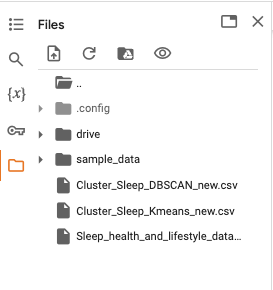



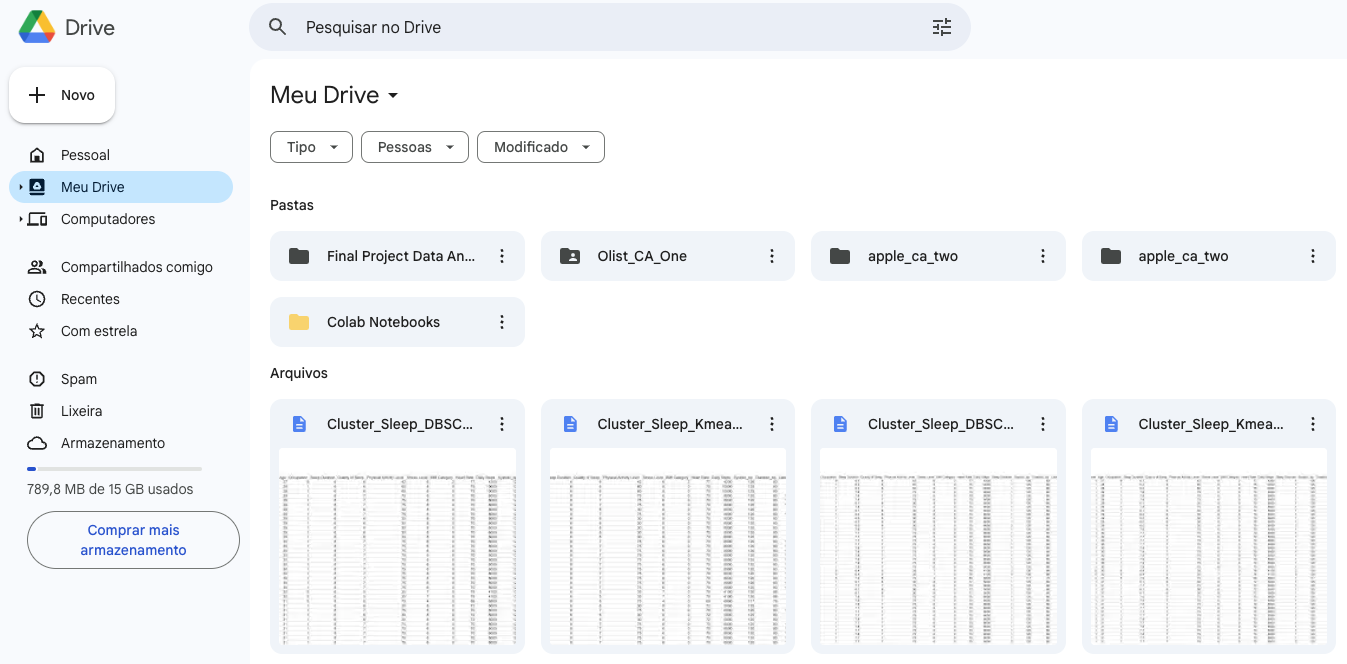


## K-means dataset

In [ ]:
df_Kmeans = pd.read_csv('Cluster_Sleep_Kmeans_new.csv')

In [ ]:
df_Kmeans.head()

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_bp,Diastolic_bp,Label
0,27,9,6,6,42,6,2,77,4200,126,83,6
1,28,1,6,6,60,8,0,75,10000,125,80,8
2,28,1,6,6,60,8,0,75,10000,125,80,8
3,29,1,8,7,75,6,0,70,8000,120,80,10
4,29,1,8,7,75,6,0,70,8000,120,80,10


In [ ]:
df_Kmeans.shape

(359, 12)

In [ ]:
df_Kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      359 non-null    int64
 1   Occupation               359 non-null    int64
 2   Sleep Duration           359 non-null    int64
 3   Quality of Sleep         359 non-null    int64
 4   Physical Activity Level  359 non-null    int64
 5   Stress Level             359 non-null    int64
 6   BMI Category             359 non-null    int64
 7   Heart Rate               359 non-null    int64
 8   Daily Steps              359 non-null    int64
 9   Systolic_bp              359 non-null    int64
 10  Diastolic_bp             359 non-null    int64
 11  Label                    359 non-null    int64
dtypes: int64(12)
memory usage: 33.8 KB


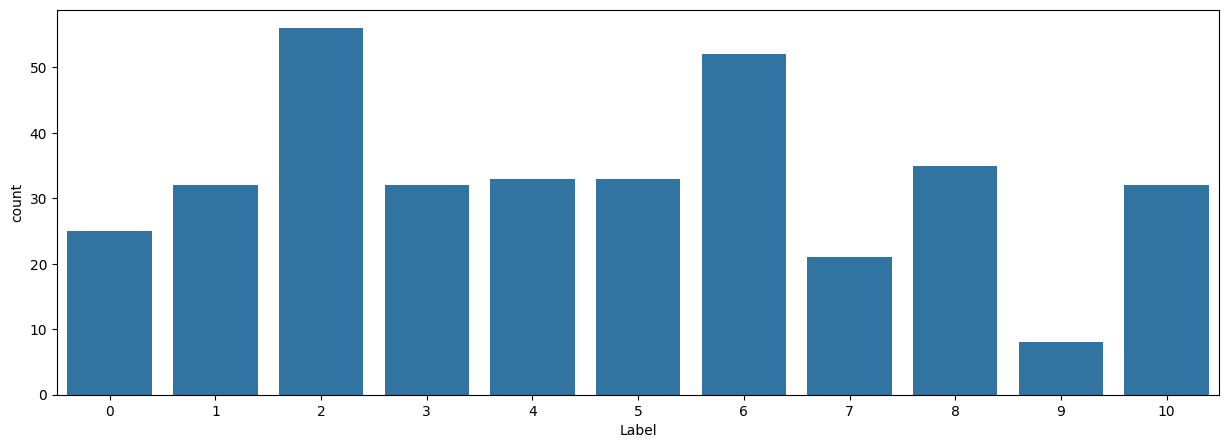

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,5))
for i, col in enumerate(['Label']):
  sns.countplot(data=df_Kmeans,
                x=col)

## DBSCAN dataset

In [ ]:
df_DBSCAN = pd.read_csv('Cluster_Sleep_DBSCAN_new.csv')

In [ ]:
df_DBSCAN.head()

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_bp,Diastolic_bp,Label
0,27,9,6,6,42,6,2,77,4200,126,83,0
1,28,1,6,6,60,8,0,75,10000,125,80,1
2,28,1,6,6,60,8,0,75,10000,125,80,1
3,29,1,8,7,75,6,0,70,8000,120,80,2
4,29,1,8,7,75,6,0,70,8000,120,80,2


In [ ]:
df_DBSCAN.shape

(359, 12)

In [ ]:
df_DBSCAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      359 non-null    int64
 1   Occupation               359 non-null    int64
 2   Sleep Duration           359 non-null    int64
 3   Quality of Sleep         359 non-null    int64
 4   Physical Activity Level  359 non-null    int64
 5   Stress Level             359 non-null    int64
 6   BMI Category             359 non-null    int64
 7   Heart Rate               359 non-null    int64
 8   Daily Steps              359 non-null    int64
 9   Systolic_bp              359 non-null    int64
 10  Diastolic_bp             359 non-null    int64
 11  Label                    359 non-null    int64
dtypes: int64(12)
memory usage: 33.8 KB


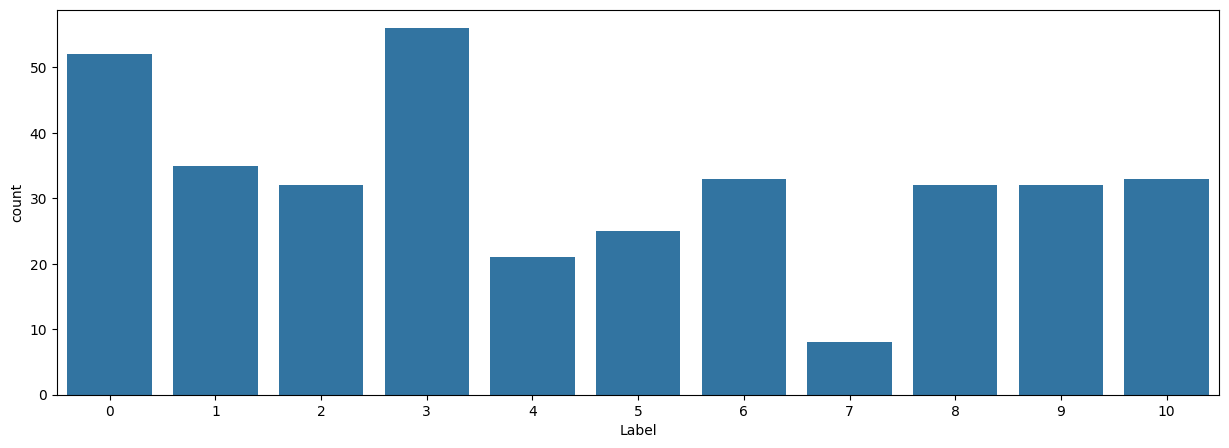

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,5))
for i, col in enumerate(['Label']):
  sns.countplot(data=df_DBSCAN,
                x=col)